In [80]:
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import unicodedata
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [81]:
Data = pd.read_csv(r"C:\Users\Carlo\Desktop\Todo el proyecto\Data Posición\df_defensas_medias.csv")
pd.set_option('display.max_columns', None)

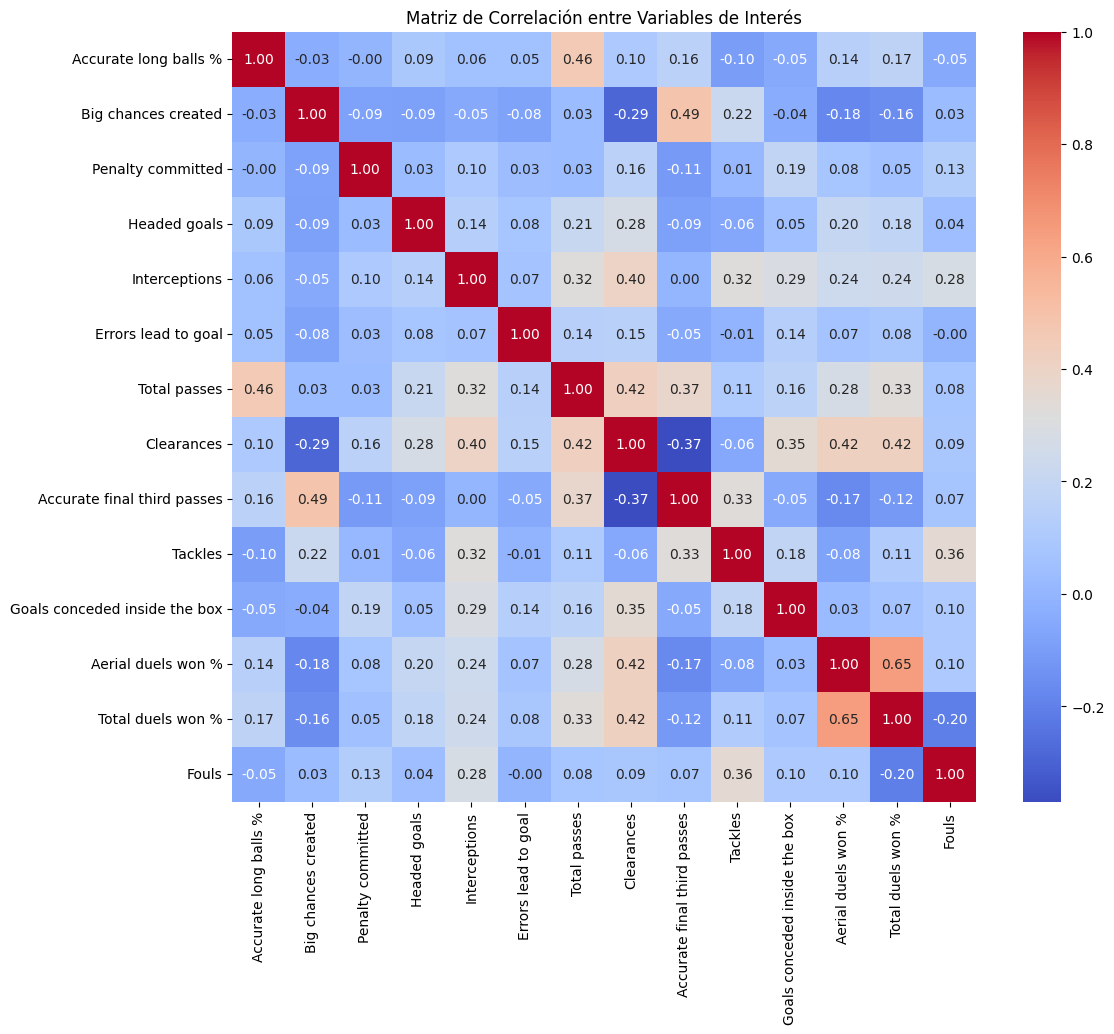

In [93]:

# Seleccionar las variables de interés
variables_interes = ['Accurate long balls %','Big chances created','Penalty committed','Headed goals','Interceptions','Errors lead to goal','Total passes','Clearances','Accurate final third passes','Tackles','Goals conceded inside the box','Aerial duels won %','Total duels won %','Fouls']

# Crear un nuevo DataFrame con solo las variables de interés
df_interes = Data[variables_interes]

# Calcular la matriz de correlación
correlacion = df_interes.corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación entre Variables de Interés')
plt.show()

In [82]:
Data

,Name,Goals,Headed goals,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Goals conceded inside the box,Aerial duels won %,Total duels won %,Fouls,Appearances,Age Range,Position,League,Level
0,José Quintero,0.220000,0.040000,1.220000,0.830000,0.000000,1.610000,0.000000,0.350000,0.220000,29.430000,77.400000,6.700000,54.720000,0.430000,84.000000,63.080000,1.000000,23.000000,3.0,2.0,Ecuador Serie A,3.0
1,Richard Schunke,0.000000,0.000000,0.860000,1.140000,0.000000,3.210000,0.000000,0.290000,0.360000,64.070000,85.840000,6.430000,58.230000,0.790000,50.000000,55.740000,0.710000,14.000000,3.0,2.0,Ecuador Serie A,3.0
2,Ricardo Adé,0.000000,0.000000,1.110000,1.290000,0.110000,3.290000,0.000000,0.290000,0.070000,44.070000,86.140000,2.820000,52.970000,0.500000,67.860000,64.150000,0.680000,28.000000,3.0,2.0,Ecuador Serie A,3.0
3,Bruno Duarte,0.070000,0.070000,1.070000,2.860000,0.000000,5.000000,0.000000,0.070000,0.070000,32.140000,76.220000,1.070000,41.050000,1.070000,75.000000,67.740000,1.000000,14.000000,2.0,2.0,Ecuador Serie A,3.0
4,Agustín García Basso,0.070000,0.000000,0.670000,0.740000,0.040000,1.520000,0.000000,0.150000,0.000000,70.520000,89.650000,11.110000,69.490000,0.810000,57.500000,53.920000,0.700000,27.000000,3.0,2.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,Patricio Pizarro,0.000000,0.000000,0.690000,0.690000,0.150000,2.380000,0.000000,0.620000,0.080000,22.080000,75.960000,1.620000,38.180000,0.460000,66.670000,54.320000,1.000000,13.000000,1.0,2.0,Argentina LPF,2.0
5058,Alex Ibacache,0.000000,0.000000,0.870000,0.200000,0.070000,1.200000,0.000000,0.330000,0.130000,27.800000,76.020000,4.930000,42.670000,0.730000,58.330000,52.220000,0.670000,15.000000,1.0,2.0,Argentina LPF,2.0
5059,Lautaro Montoya,0.000000,0.000000,0.500000,1.080000,0.000000,1.500000,0.000000,1.420000,0.000000,29.330000,77.840000,6.000000,40.910000,0.580000,53.850000,36.250000,1.250000,12.000000,2.0,2.0,Argentina LPF,2.0
5060,Guillermo Enrique,0.060000,0.000000,1.760000,0.820000,0.120000,1.820000,0.000000,1.000000,0.240000,16.410000,52.690000,2.180000,28.570000,0.880000,59.570000,50.960000,1.120000,17.000000,1.0,2.0,Argentina LPF,2.0


In [83]:
Data = Data.fillna(0)

In [84]:
Data.columns

Index(['Name', 'Goals', 'Headed goals', 'Tackles', 'Interceptions',
       'Penalty committed', 'Clearances', 'Errors lead to goal',
       'Dribbled past', 'Big chances created', 'Total passes',
       'Accurate passes %', 'Accurate final third passes',
       'Accurate long balls %', 'Goals conceded inside the box',
       'Aerial duels won %', 'Total duels won %', 'Fouls', 'Appearances',
       'Age Range', 'Position', 'League', 'Level'],
      dtype='object')

In [85]:
columnas_a_dividir = ['Total passes','Accurate passes %', 'Accurate final third passes',
       'Accurate long balls %','Aerial duels won %', 'Total duels won %']

# Divide todos los datos de las columnas por 10
Data[columnas_a_dividir] = Data[columnas_a_dividir] / 10

In [86]:
Data

,Name,Goals,Headed goals,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Goals conceded inside the box,Aerial duels won %,Total duels won %,Fouls,Appearances,Age Range,Position,League,Level
0,José Quintero,0.220000,0.040000,1.220000,0.830000,0.000000,1.610000,0.000000,0.350000,0.220000,2.943000,7.74000,0.670000,5.472000,0.430000,8.400000,6.308000,1.000000,23.000000,3.0,2.0,Ecuador Serie A,3.0
1,Richard Schunke,0.000000,0.000000,0.860000,1.140000,0.000000,3.210000,0.000000,0.290000,0.360000,6.407000,8.58400,0.643000,5.823000,0.790000,5.000000,5.574000,0.710000,14.000000,3.0,2.0,Ecuador Serie A,3.0
2,Ricardo Adé,0.000000,0.000000,1.110000,1.290000,0.110000,3.290000,0.000000,0.290000,0.070000,4.407000,8.61400,0.282000,5.297000,0.500000,6.786000,6.415000,0.680000,28.000000,3.0,2.0,Ecuador Serie A,3.0
3,Bruno Duarte,0.070000,0.070000,1.070000,2.860000,0.000000,5.000000,0.000000,0.070000,0.070000,3.214000,7.62200,0.107000,4.105000,1.070000,7.500000,6.774000,1.000000,14.000000,2.0,2.0,Ecuador Serie A,3.0
4,Agustín García Basso,0.070000,0.000000,0.670000,0.740000,0.040000,1.520000,0.000000,0.150000,0.000000,7.052000,8.96500,1.111000,6.949000,0.810000,5.750000,5.392000,0.700000,27.000000,3.0,2.0,Ecuador Serie A,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5057,Patricio Pizarro,0.000000,0.000000,0.690000,0.690000,0.150000,2.380000,0.000000,0.620000,0.080000,2.208000,7.59600,0.162000,3.818000,0.460000,6.667000,5.432000,1.000000,13.000000,1.0,2.0,Argentina LPF,2.0
5058,Alex Ibacache,0.000000,0.000000,0.870000,0.200000,0.070000,1.200000,0.000000,0.330000,0.130000,2.780000,7.60200,0.493000,4.267000,0.730000,5.833000,5.222000,0.670000,15.000000,1.0,2.0,Argentina LPF,2.0
5059,Lautaro Montoya,0.000000,0.000000,0.500000,1.080000,0.000000,1.500000,0.000000,1.420000,0.000000,2.933000,7.78400,0.600000,4.091000,0.580000,5.385000,3.625000,1.250000,12.000000,2.0,2.0,Argentina LPF,2.0
5060,Guillermo Enrique,0.060000,0.000000,1.760000,0.820000,0.120000,1.820000,0.000000,1.000000,0.240000,1.641000,5.26900,0.218000,2.857000,0.880000,5.957000,5.096000,1.120000,17.000000,1.0,2.0,Argentina LPF,2.0


In [87]:
Clearances_media = Data["Clearances"].mean()
Clearances_min = Data["Clearances"].min()
Clearances_max = Data["Clearances"].max()
print(Clearances_media)
print(Clearances_min)
print(Clearances_max)
print("-"*100)
Aerial_duels_won_media = Data["Aerial duels won %"].mean()
Aerial_duels_won_min = Data["Aerial duels won %"].min()
Aerial_duels_won__max = Data["Aerial duels won %"].max()
print(Aerial_duels_won_media)
print(Aerial_duels_won_min )
print(Aerial_duels_won__max)
print("-"*100)
Goals_conceded_inside_media = Data["Goals conceded inside the box"].mean()
Goals_conceded_inside_min = Data["Goals conceded inside the box"].min()
Goals_conceded_inside_max = Data["Goals conceded inside the box"].max()
print(Goals_conceded_inside_media)
print(Goals_conceded_inside_min)
print(Goals_conceded_inside_max)
print("-"*100)
Tackles_media = Data["Tackles"].mean()
Tackles_min = Data["Tackles"].min()
Tackles_max = Data["Tackles"].max()
print(Tackles_media)
print(Tackles_min)
print(Tackles_max)
print("-"*100)
Accurate_final_third_passesmedia = Data["Accurate final third passes"].mean()
Accurate_final_third_passesmin = Data["Accurate final third passes"].min()
Accurate_final_third_passesmax = Data["Accurate final third passes"].max()
print(Accurate_final_third_passesmedia)
print(Accurate_final_third_passesmin)
print(Accurate_final_third_passesmax)
print("-"*100)
creadas_media = Data["Big chances created"].mean()
creadas_min = Data["Big chances created"].min()
creadas_max = Data["Big chances created"].max()
print(creadas_media)
print(creadas_min)
print(creadas_max)
print("-"*100)


2.4340031614305473
0.0
8.8
----------------------------------------------------------------------------------------------------
5.535967397747481
0.0
10.0
----------------------------------------------------------------------------------------------------
0.9270381347559771
0.0
3.0
----------------------------------------------------------------------------------------------------
1.3340090891128236
0.0
4.62
----------------------------------------------------------------------------------------------------
0.46035822959889344
0.003
2.462
----------------------------------------------------------------------------------------------------
0.05481920569057499
0.0
0.68
----------------------------------------------------------------------------------------------------


In [88]:
Columna_habilidades = Data.columns.drop(["Name", "League"])
features = Data[Columna_habilidades]
# Crea un objeto MinMaxScaler
scaler = MinMaxScaler()
# Ajusta el escalador a tus datos y luego transforma tus datos
features_scaled = scaler.fit_transform(features)
# Inicializa el modelo NearestNeighbors
model = NearestNeighbors(n_neighbors=5)  # Buscamos 4 vecinos porque uno de ellos será el jugador mismo
# Ajusta el modelo a tus datos
model.fit(features_scaled)
caracteristicas_grafico = ['Errors lead to goal','Interceptions','Penalty committed','Clearances','Tackles','Dribbled past','Total passes']
# Función para normalizar nombres (ignorar mayúsculas y acentos)
def normalizar_nombre(nombre):
    nombre = nombre.lower()
    nombre = unicodedata.normalize('NFD', nombre)
    nombre = nombre.encode('ascii', 'ignore').decode("utf-8")
    return nombre

def buscar_jugadores_similares(nombre, caracteristicas_grafico):
    jugador = Data[Data['Name'] == nombre]
    if len(jugador) == 0:
        return 'Jugador no encontrado'
    else:
        jugador_scaled = scaler.transform(jugador[features.columns])  # Normalización para el modelo
        distancias, indices = model.kneighbors(jugador_scaled)
        jugadores_similares = Data.iloc[indices[0][0:]]  # Excluimos el primer resultado porque será el jugador mismo
        colores = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black']
        
        # Agregar 'Media' a la lista de jugadores similares antes de mostrar el DataFrame
        jugadores_similares = pd.concat([jugadores_similares, Data[Data['Name'] == 'Media']])
        display(jugadores_similares)

        # Escala todas las características de los jugadores similares
        fig = go.Figure()
        for i, row in enumerate(jugadores_similares[caracteristicas_grafico].values):  # Usamos los valores originales aquí
            fig.add_trace(go.Scatterpolar(
                r=row,
                theta=caracteristicas_grafico,
                fill='toself',
                name=jugadores_similares.iloc[i]['Name']
            ))
        fig.update_layout(
            autosize=False,
            width=800,
            height=800,
            polar=dict(
                radialaxis=dict(
                    visible=True,
                    range=[-2, 7]  # Ajusta este rango según tus datos
                )),
            showlegend=True
        )
        fig.show()
        
       # Configura una cuadrícula de subplots con 3 filas y 2 columnas
        fig, axs = plt.subplots(3, 2, figsize=(20, 12))  # Ajusta el tamaño según sea necesario
        # Gráfico de dispersión para Clearances
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Clearances'], color=colores[i % len(colores)], marker='o')
        for line in [Clearances_max, Clearances_media, Clearances_min]:
            axs[0, 0].axhline(y=line, color='r', linestyle='--')
        axs[0, 0].set_title('Comparativa de Clearances de los jugadores similares')
        axs[0, 0].set_xticks(range(len(jugadores_similares)))
        axs[0, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 0].set_xlabel('Jugadores')
        axs[0, 0].set_ylabel('Clearances')
        # Gráfico de dispersión para Aerial duels won %
        for i, name in enumerate(jugadores_similares['Name']):
            axs[0, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Aerial duels won %'], color=colores[i % len(colores)], marker='o')
        for line in [Aerial_duels_won__max, Aerial_duels_won_media, Aerial_duels_won_min]:
            axs[0, 1].axhline(y=line, color='r', linestyle='--')
        axs[0, 1].set_title('Media de Aerial duels won % de los jugadores similares')
        axs[0, 1].set_xticks(range(len(jugadores_similares)))
        axs[0, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[0, 1].set_xlabel('Jugadores')
        axs[0, 1].set_ylabel('Aerial duels won %')
        # Gráfico de dispersión para Goals conceded inside the box
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Goals conceded inside the box'], color=colores[i % len(colores)], marker='o')
        for line in [Goals_conceded_inside_max, Goals_conceded_inside_media, Goals_conceded_inside_min]:
            axs[1, 0].axhline(y=line, color='r', linestyle='--')
        axs[1, 0].set_title('Media de Goals conceded inside the box de los jugadores similares')
        axs[1, 0].set_xticks(range(len(jugadores_similares)))
        axs[1, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 0].set_xlabel('Jugadores')
        axs[1, 0].set_ylabel('Goals conceded inside the box')
        # Gráfico de dispersión para Tackles
        for i, name in enumerate(jugadores_similares['Name']):
            axs[1, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Tackles'], color=colores[i % len(colores)], marker='o')
        for line in [Tackles_max, Tackles_media, Tackles_min]:
            axs[1, 1].axhline(y=line, color='r', linestyle='--')
        axs[1, 1].set_title('Media de Tackles de los jugadores similares')
        axs[1, 1].set_xticks(range(len(jugadores_similares)))
        axs[1, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[1, 1].set_xlabel('Jugadores')
        axs[1, 1].set_ylabel('Tackles')
        # Gráfico de dispersión para Accurate final third passes
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 0].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Accurate final third passes'], color=colores[i % len(colores)], marker='o')
        for line in [Accurate_final_third_passesmax, Accurate_final_third_passesmedia, Accurate_final_third_passesmin]:
            axs[2, 0].axhline(y=line, color='r', linestyle='--')
        axs[2, 0].set_title('Media de Accurate final third passes de los jugadores similares')
        axs[2, 0].set_xticks(range(len(jugadores_similares)))
        axs[2, 0].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 0].set_xlabel('Jugadores')
        axs[2, 0].set_ylabel('Accurate final third passes')
        # Gráfico de dispersión para Big chances created
        for i, name in enumerate(jugadores_similares['Name']):
            axs[2, 1].scatter(i, jugadores_similares.loc[jugadores_similares['Name'] == name, 'Big chances created'], color=colores[i % len(colores)], marker='o')
        for line in [creadas_max, creadas_media, creadas_min]:
            axs[2, 1].axhline(y=line, color='r', linestyle='--')
        axs[2, 1].set_title('Media de Total duels won % de los jugadores similares')
        axs[2, 1].set_xticks(range(len(jugadores_similares)))
        axs[2, 1].set_xticklabels(jugadores_similares['Name'], rotation=45)
        axs[2, 1].set_xlabel('Jugadores')
        axs[2, 1].set_ylabel('Big chances created')

        plt.tight_layout()
        # Ajusta el layout para que no haya superposición de elementos
          
   
        
        plt.show()
        return

Buscamos un defensa central

,Name,Goals,Headed goals,Tackles,Interceptions,Penalty committed,Clearances,Errors lead to goal,Dribbled past,Big chances created,Total passes,Accurate passes %,Accurate final third passes,Accurate long balls %,Goals conceded inside the box,Aerial duels won %,Total duels won %,Fouls,Appearances,Age Range,Position,League,Level
1321,Cristian Romero,0.000000,0.000000,2.520000,1.630000,0.040000,3.590000,0.040000,0.630000,0.070000,5.867000,8.76900,0.544000,5.775000,1.300000,6.867000,5.929000,1.560000,27.000000,2.0,2.0,Inglaterra Premier League,1.0
1451,Armando Izzo,0.030000,0.030000,2.430000,1.670000,0.030000,2.630000,0.000000,0.530000,0.030000,5.197000,8.76800,0.503000,5.410000,0.830000,5.195000,6.036000,1.470000,30.000000,2.0,2.0,Italia Serie A,1.0
4778,Santiago Bueno,0.000000,0.000000,1.850000,0.910000,0.030000,3.000000,0.060000,0.350000,0.030000,5.288000,8.66000,0.503000,4.912000,1.240000,6.379000,6.553000,1.090000,34.000000,2.0,2.0,España La Liga 1,1.0
1545,Ruan,0.000000,0.000000,1.650000,1.040000,0.040000,3.350000,0.040000,0.430000,0.000000,4.065000,8.89800,0.135000,5.846000,0.910000,5.862000,5.792000,1.170000,23.000000,2.0,2.0,Italia Serie A,1.0
1399,Thilo Kehrer,0.000000,0.000000,1.590000,1.260000,0.040000,2.700000,0.040000,0.850000,0.070000,3.674000,8.53800,0.359000,5.000000,1.070000,5.217000,5.077000,1.150000,27.000000,2.0,2.0,Inglaterra Premier League,1.0
5061,Media,0.033031,0.013039,1.334009,1.103078,0.020364,2.434003,0.007813,0.483395,0.054819,3.677292,7.90486,0.460358,4.444954,0.927038,5.535967,5.599317,0.850609,22.970362,0.0,0.0,0,0.0


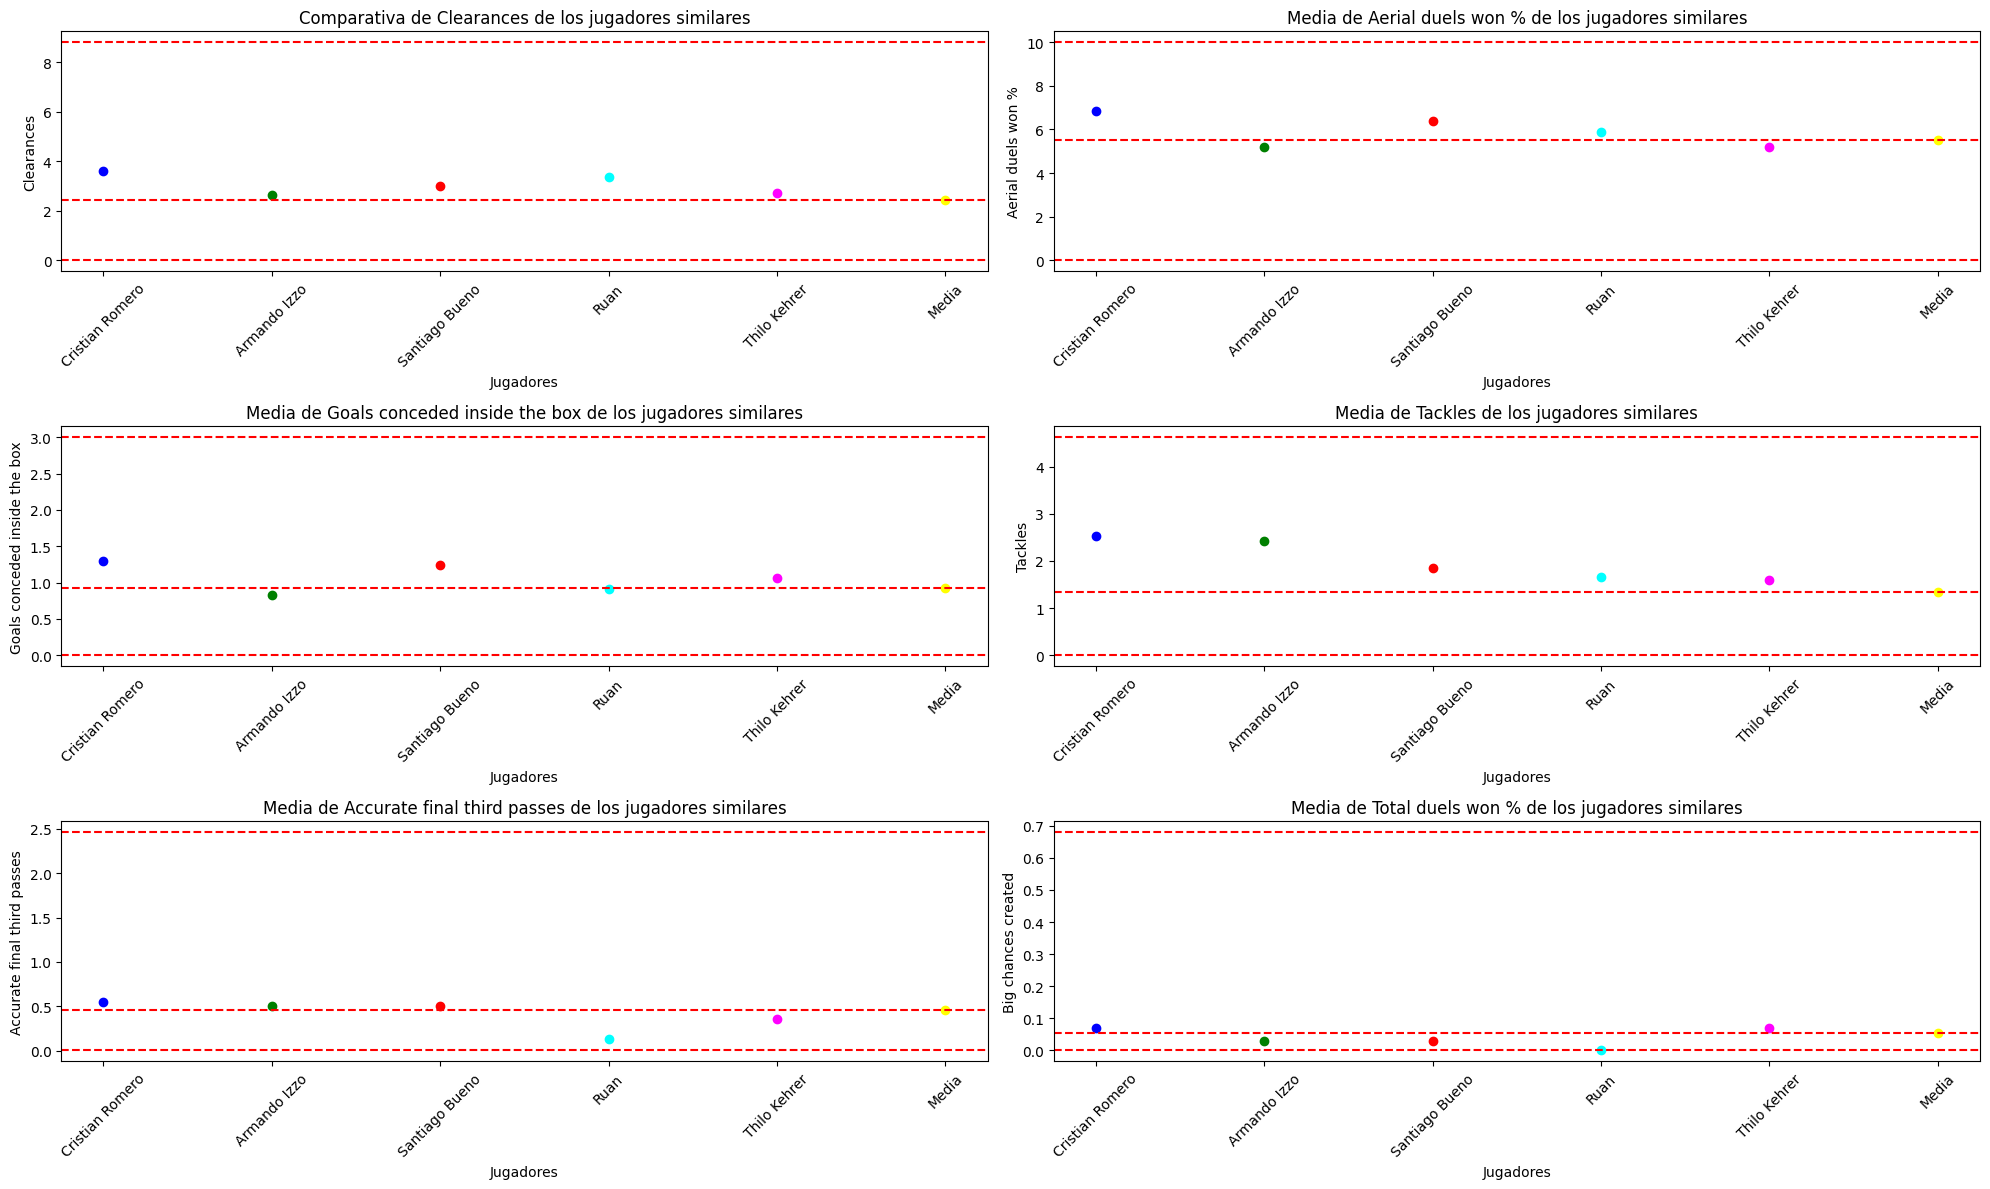

In [89]:
buscar_jugadores_similares('Cristian Romero', caracteristicas_grafico)